In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set();

In [4]:
df = pd.read_excel("../data/coalpublic2013.xls", header=2, index_col="MSHA ID")

In [5]:
df.head()

,Year,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [6]:
df["Company Type"].unique()

array([u'Indepedent Producer Operator', u'Operating Subsidiary',
       u'Contractor'], dtype=object)

In [10]:
#fix values for indepedent producer operator with indepeNdent..
df['Company Type'].replace(to_replace="Indepedent Producer Operator", 
                           value='Independent Producer Operator',
                          inplace=True)
#By adding the inplace the function will be implemented in the dataframe

In [11]:
df['Company Type'].head()

MSHA ID
103381    Independent Producer Operator
103404    Independent Producer Operator
100759    Independent Producer Operator
103246    Independent Producer Operator
103451    Independent Producer Operator
Name: Company Type, dtype: object

In [12]:
#Now we want the column names to be attached so we car more easily call them in functions etc.
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [13]:
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [14]:
len(df)

1450

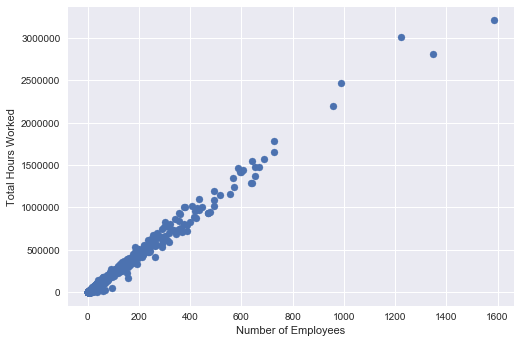

In [17]:
#checking relation between two variables
plt.scatter(df.Average_Employees, df.Labor_Hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked")

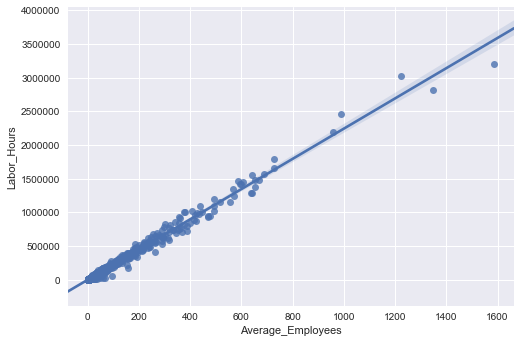

In [22]:
#You can also use seaborn plot to have lineari regression plot with a confidence interval of 95%
sns.regplot(df.Average_Employees, df.Labor_Hours)
#to save this figure
plt.savefig("../figures/2015-11-21" + "-employees_vs_hours.png")

In [24]:
# print out all columns
for column in df.columns:
    print column

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours


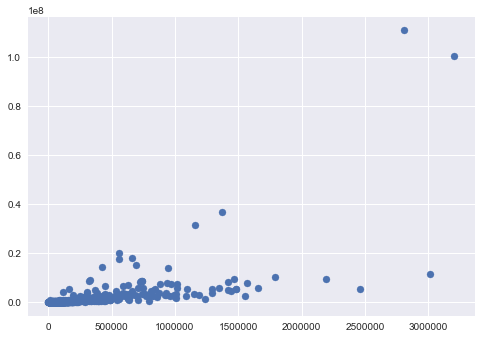

In [26]:
#Labor hours is predictive for production, see below:
plt.scatter(df.Labor_Hours, df["Production_(short_tons)"])

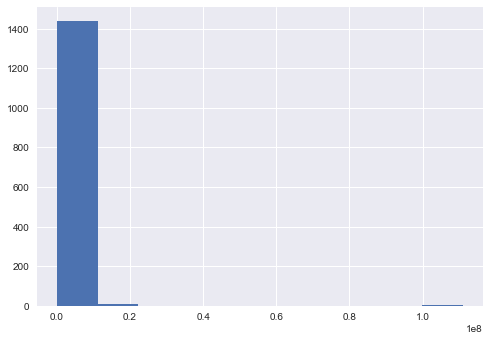

In [27]:
#let's make a histogram out of this.
df["Production_(short_tons)"].hist()

In [33]:
#We see a very bad histogram, let's look where production is equal to 0.
df[df["Production_(short_tons)"] == 0]
#It look's like quite of these has produced 0.


,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
100329,2013,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",UNIT,Appalachia Southern,0,59,144002
102901,2013,Shoal Creek Mine,Alabama,Jefferson,Active,Surface,Independent Producer Operator,Mine and Preparation Plant,Drummond Company Inc,"P.O. Box 1549, Jasper, AL 35501",United Mine Workers of America,Appalachia Southern,0,5,12396
102976,2013,Piney Woods Preparation Plant,Alabama,Shelby,Active,Surface,Independent Producer Operator,Preparation Plant,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,0,5,14828
102976,2013,Piney Woods Preparation Plant,Alabama,Shelby,Active,Underground,Independent Producer Operator,Preparation Plant,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,0,9,23193
103380,2013,Calera,Alabama,Shelby,Active,Surface,Independent Producer Operator,Preparation Plant,Conrad Yelvington Distributors,"13101 Telecom Dr #101, Tampa, FL 33637",,Appalachia Southern,0,6,12621
103380,2013,Calera,Alabama,Shelby,Active,Underground,Independent Producer Operator,Preparation Plant,Conrad Yelvington Distributors,"13101 Telecom Dr #101, Tampa, FL 33637",,Appalachia Southern,0,1,1402
103364,2013,Brc Alabama No. 7 Llc,Alabama,Tuscaloosa,Active,Underground,Independent Producer Operator,Preparation Plant,Brc Alabama No. 7 Llc,"P.O. Box 157, Brookwood, AL 35444",,Appalachia Southern,0,12,14324
103155,2013,Corinth Prep Plant,Alabama,Walker,Active,Surface,Independent Producer Operator,Preparation Plant,Warrior Investment Company Inc,"218 Highway 195, Jasper, AL 35503",,Appalachia Southern,0,12,27996
103155,2013,Corinth Prep Plant,Alabama,Walker,Active,Underground,Independent Producer Operator,Preparation Plant,Warrior Investment Company Inc,"218 Highway 195, Jasper, AL 35503",,Appalachia Southern,0,22,51994


In [37]:
#Now let's look at mines that produced more than 0. and make a new dataframe out of it.
# We are removing data here. The reason is if we want predict production of mines. We will have to restrict to mines that produces more than 0.
df = df[df["Production_(short_tons)"] > 0]

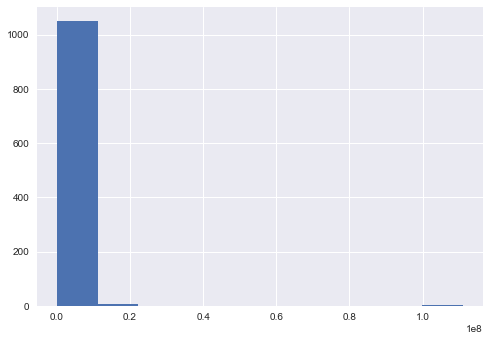

In [38]:
df["Production_(short_tons)"].hist()

In [39]:
# We still see a skewed distribution. So now we will take a log by creating a new column.

In [41]:
df["log_production"] = np.log(df["Production_(short_tons)"])

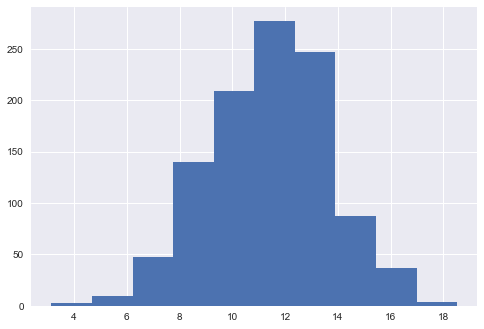

In [42]:
#Now we will take this new (transformed) variable and take a histrogram of it and this follows a more normal distribution so now we
#we have our prediction variable.
df["log_production"].hist()

In [43]:
df.to_csv("../data/cleaned_coalpublic2013.csv")